In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_raw = pd.read_csv('..selected_dataset\DiaHealth A Bangladeshi Dataset for Type 2 Diabetes Prediction\Diabetes_Final_Data_V2.csv')
df_raw.head()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No


In [3]:
df = df_raw.copy()
print('Copy Completed')

Copy Completed


#### **Dimension Checking**

In [15]:
df.shape

(1000, 14)

#### **Column Names**

In [16]:
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

## **I. Exploratory Data Analysis**

### **1.1. Data Cleaning**

#### **1.1.1. Check Duplicated Data**

In [7]:
df[df.duplicated(keep=False)].count()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

#### **1.1.2. Check Missing Data**

In [8]:
df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

#### **1.1.3. Check Outliers**

### **1.2. Data Overview**

#### **1.2.1. Data Types**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


#### **1.2.2. Categorical Features**

In [23]:
df.select_dtypes(include=['object']).columns

Index(['Gender', 'CLASS'], dtype='object')

In [25]:
df[['Gender', 'CLASS']].head()

,Gender,CLASS
0,F,N
1,M,N
2,F,N
3,F,N
4,M,N


In [ ]:
# df['Gender'].value_counts()

Gender
M    565
F    434
f      1
Name: count, dtype: int64


In [ ]:
# print('class: ', df['CLASS'].unique())
# print(df['CLASS'].value_counts())

class:  ['N' 'N ' 'P' 'Y' 'Y ']
CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64


**Class Information:**

- Y for Yes, means Diabetic

- N for No, means Non-Diabetic

- P for Predicted, means Predict-Diabetic

**Label Encoding**

- WE are gonna drop `CLASS` column with value `P` as we cannot take the ALREADY PREDICTED data to train for another prediction  and also rename `"Y "` and `"N "` to `1` and `0` respectively

- `1` for `F` and `0` for `M`

**Drop Predicted Class**

In [35]:
df.drop(df[df['CLASS'] == 'P'].index, inplace=True)
df['CLASS'].replace({'Y ': 'Y', 'N ': 'N'}, inplace=True)
df['CLASS'].value_counts()

CLASS
Y    844
N    103
Name: count, dtype: int64

**Label Encoding**

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# df['Gender'] = label_encoder.fit_transform(df['Gender'])

#### **1.2.2. Data Statistics for Numerical Features**

In [12]:
df.select_dtypes(include=['int64', 'float64']).describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


### **1.3. Data Visualization**

#### **1.3.1. Pairplot**

Text(0.5, 1.0, 'Diabetes Pairplot')

<Figure size 2000x1000 with 0 Axes>

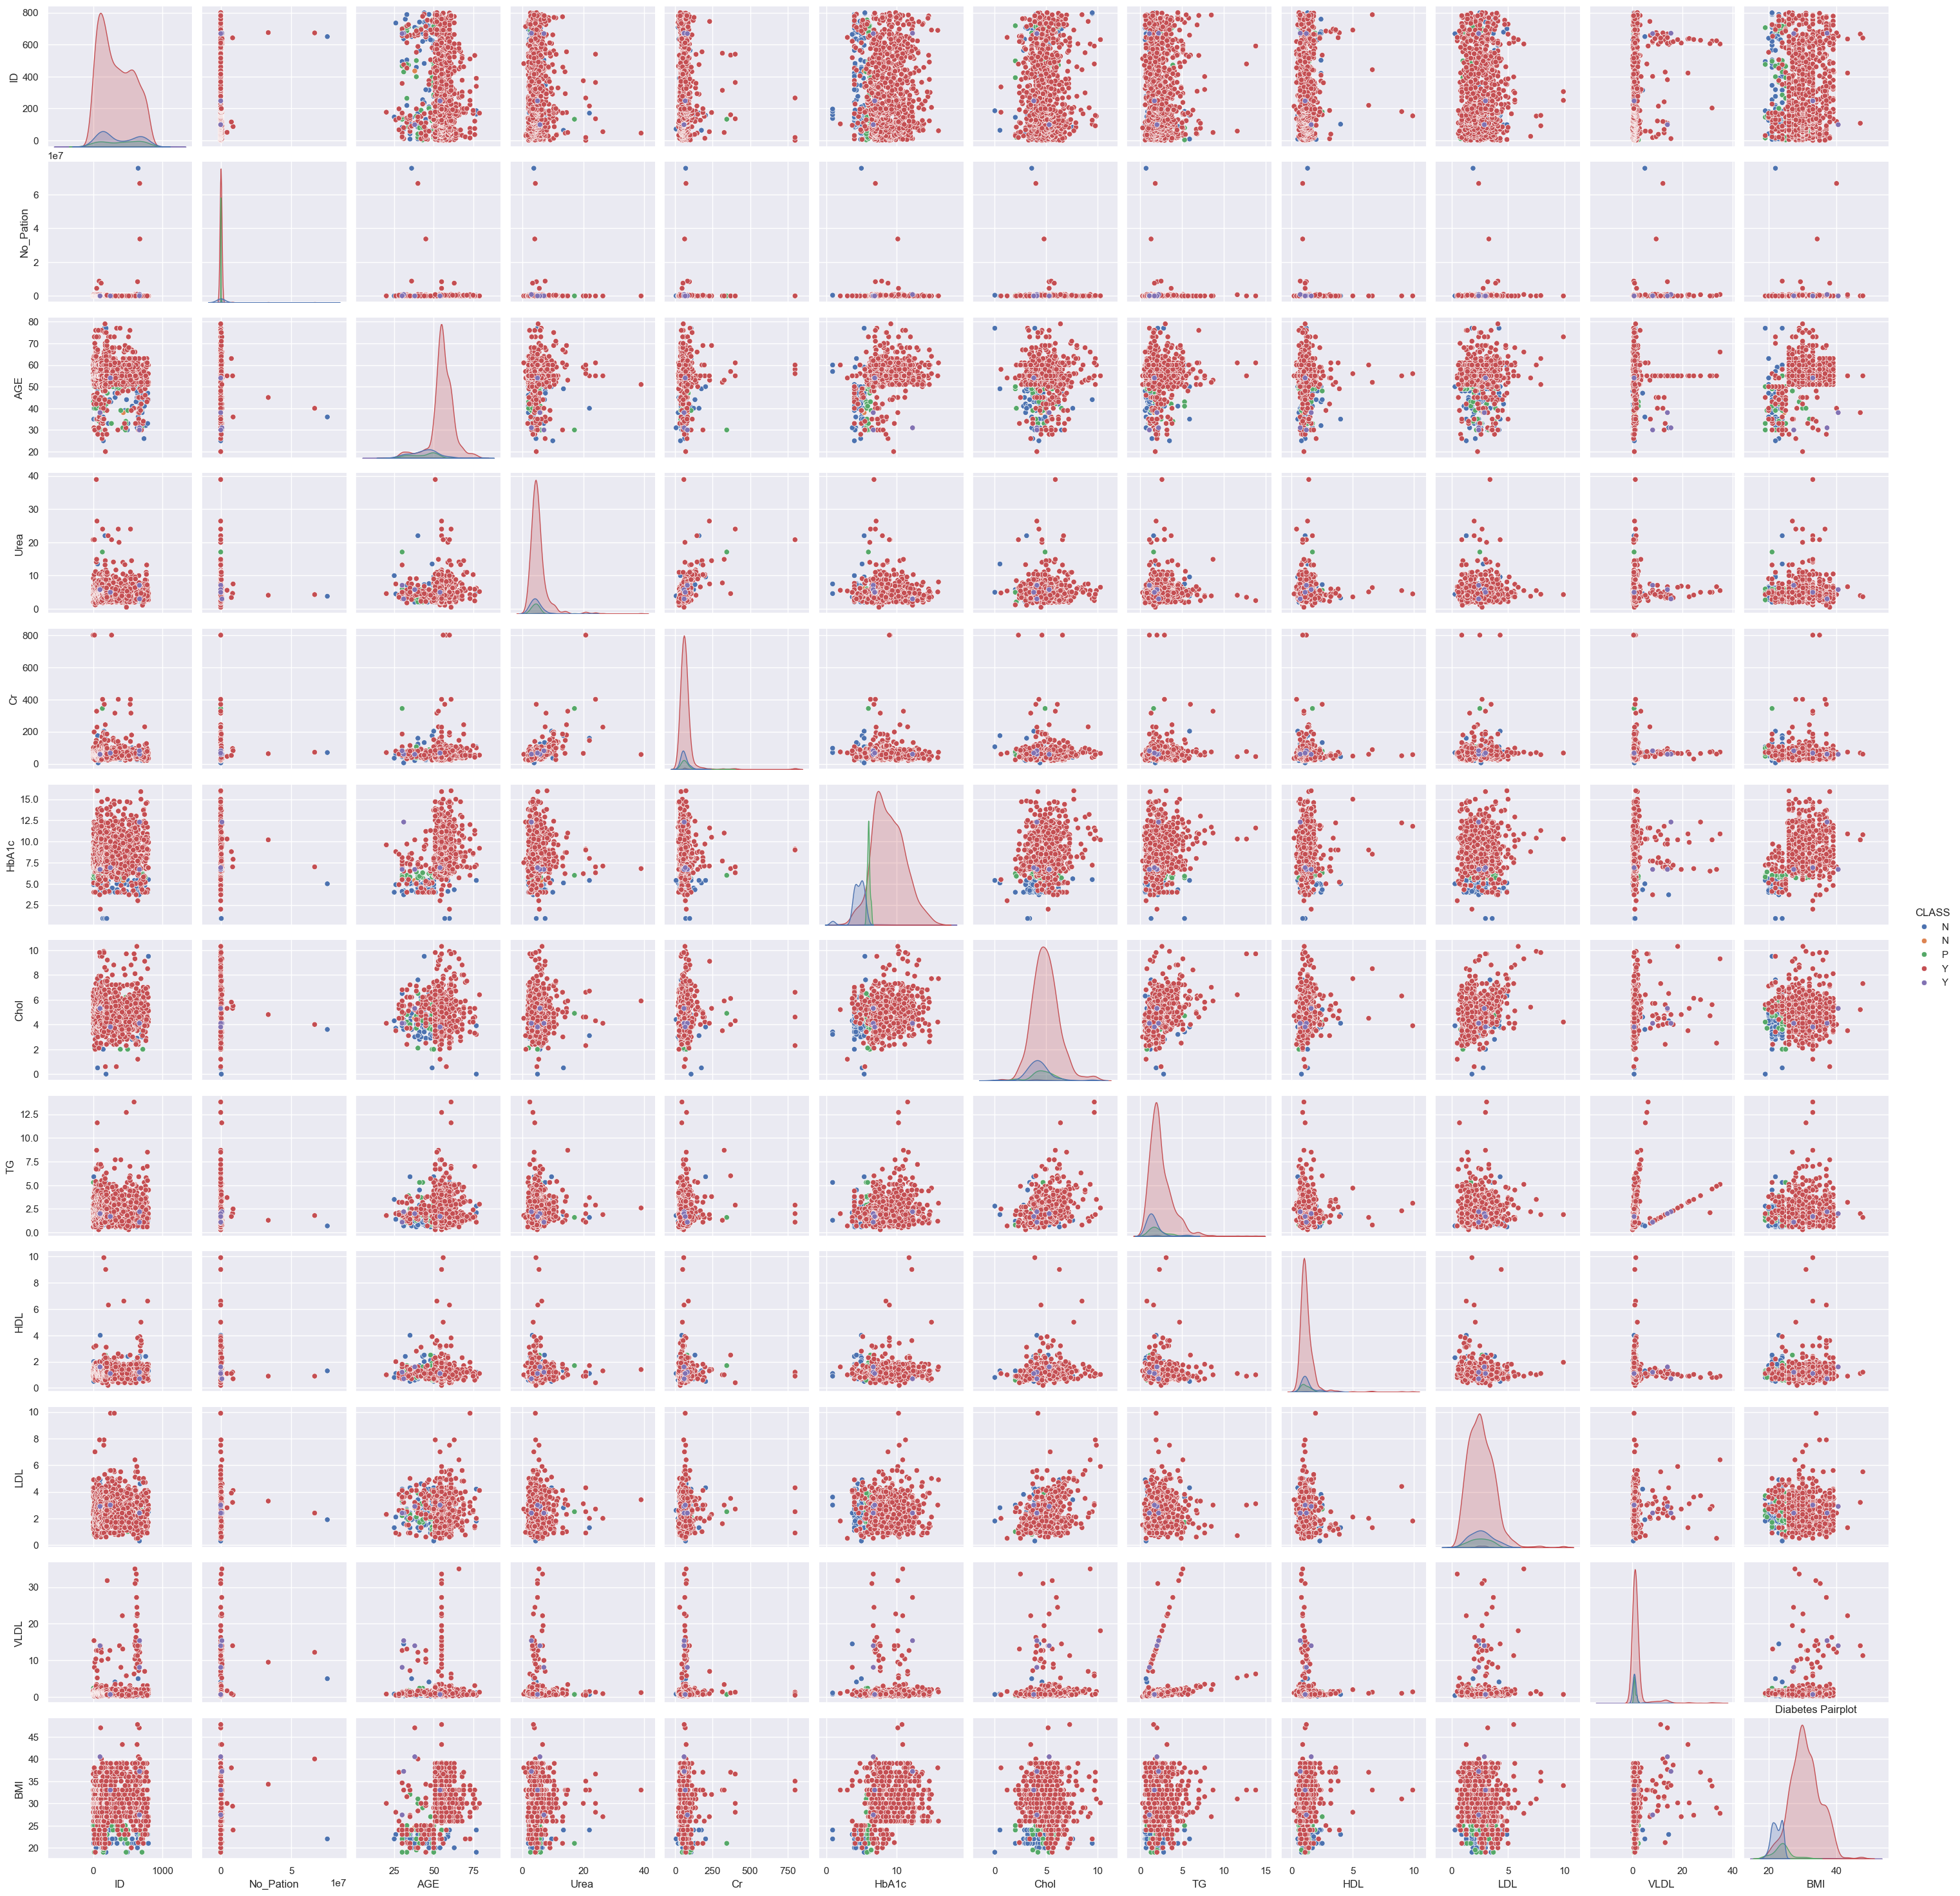

In [22]:
plt.figure(figsize=(20, 10))
sns.pairplot(df, hue='CLASS', )
plt.title('Diabetes Pairplot')

import 

In [1]:
from ..scripts import check_python_env as env

env.print_env()

ImportError: attempted relative import with no known parent package